In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading in data

In [16]:
df = pd.read_csv('tech_layoffs.csv')
df

,Unnamed: 0,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Funding
0,0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369,1700.0
1,1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850,733.0
2,2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857,116.0
3,3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369,500.0
4,4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053,138.0
1414,1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864,164.0
1415,1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207,826.0
1416,1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057,199.0


## Correcting data types

In order to prepare the data for exploratory analysis, we are going to correct the datatypes such that they are easily usable by plotting functions.

In [3]:
df.dtypes

Unnamed: 0                       int64
#                                int64
Company                         object
Location_HQ                     object
Country                         object
Continent                       object
Laid_Off                         int64
Date_layoffs                    object
Percentage                     float64
Company_Size_before_Layoffs      int64
Company_Size_after_layoffs       int64
Industry                        object
Stage                           object
Money_Raised_in_$_mil           object
Year                             int64
lat                            float64
lng                            float64
Funding                        float64
dtype: object

In [4]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

Industry
Consumer          52486
Retail            52065
Other             39002
Transportation    35649
Food              31024
Finance           27248
Real Estate       15102
Sales             13151
Healthcare        13069
Crypto            10374
Travel            10371
Fitness            8328
Education          8310
Hardware           7480
Marketing          7449
Security           6632
Media              6251
Infrastructure     5835
HR                 5292
Data               4960
Recruiting         4328
Logistics          4287
Construction       3703
Support            2409
Product            1401
Manufacturing       790
Aerospace           783
Legal               656
Energy              557
AI                  170
Name: Laid_Off, dtype: int64


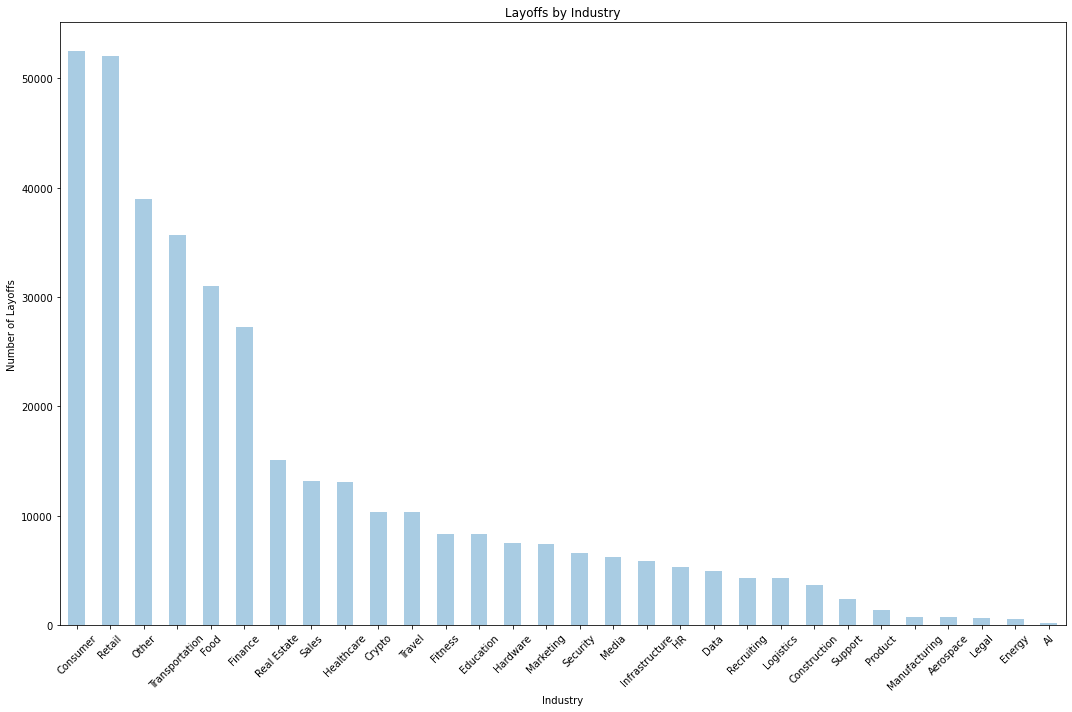

In [28]:
#group data by industry, sum laid-off values
industry_layoffs = df.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False)

print(industry_layoffs)

#plot for sum of layoffs
plt.figure(figsize = (15, 10))
industry_layoffs.plot(kind = 'bar', color = '#A9CCE3')
plt.title('Layoffs by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation=45)
plt.tight_layout()

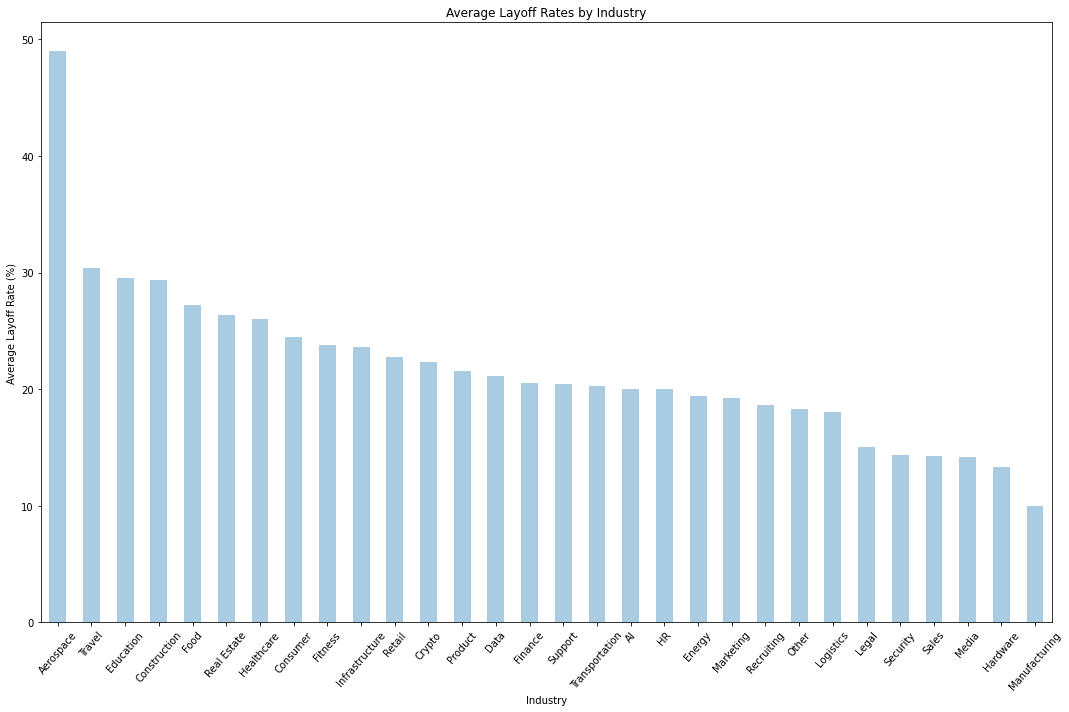

In [29]:
#group by industry percentage
industry_layoff_rates = df.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

#plot for rates
plt.figure(figsize = (15, 10))
industry_layoff_rates.plot(kind = 'bar', color = '#A9CCE3')
plt.title('Average Layoff Rates by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Layoff Rate (%)')
plt.xticks(rotation=49)
plt.tight_layout()

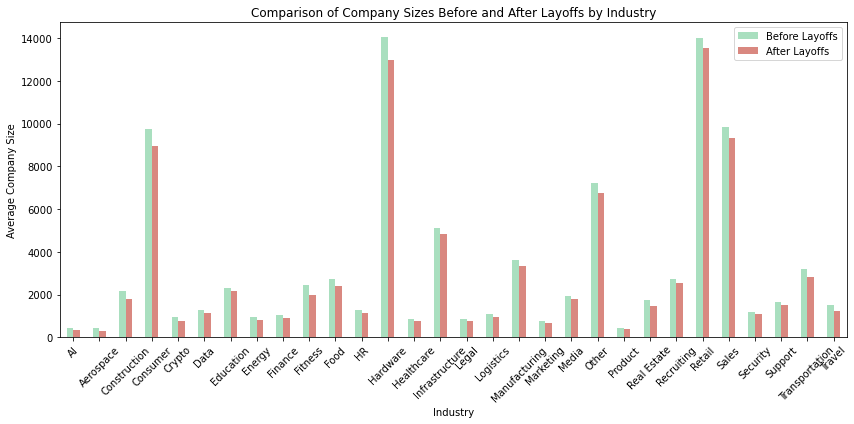

In [33]:
# company size before/after layoffs by industry
industry_sizes = df.groupby('Industry').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#D98880'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Company Size')
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.tight_layout()